In [62]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import numpy as np
import pickle

df=pd.read_csv('heart.csv')
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [63]:
# df = df.drop(['id', 'dataset'], axis=1)

In [64]:
# df=df.rename(columns={'thalc':'thalach','num':'target'})

In [65]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [66]:
df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0]).astype(int)

In [67]:
cat=df.select_dtypes(include=['object']).columns
num=df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables")
print(cat)
print("Numerical Variables")
print(num)

Categorical Variables
Index([], dtype='object')
Numerical Variables
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [68]:
X = df.drop('target', axis=1)
y = df['target']


In [69]:
print("Any NaN in X:", np.any(np.isnan(X)))
print("Any NaN in y:", np.any(np.isnan(y)))
print("Any infinite values in X:", np.any(np.isinf(X)))
print("Any infinite values in y:", np.any(np.isinf(y)))

Any NaN in X: False
Any NaN in y: False
Any infinite values in X: False
Any infinite values in y: False


In [70]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [72]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

Testing Accuracy for Logistic Regression: 0.8688524590163934
Testing Sensitivity for Logistic Regression: 0.8620689655172413
Testing Specificity for Logistic Regression: 0.875
Testing Precision for Logistic Regression: 0.8620689655172413
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



/home/agrima/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


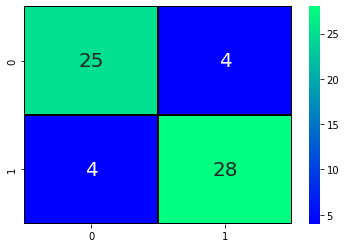

In [73]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.97      0.97      0.97        32

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61

Testing Accuracy for Decision Tree: 0.9672131147540983
Testing Sensitivity for Decision Tree: 0.9655172413793104
Testing Specificity for Decision Tree: 0.96875
Testing Precision for Decision Tree: 0.9655172413793104


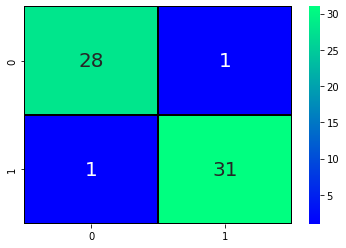

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)

cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

label_encoders = {
    'sex': LabelEncoder().fit(['Male', 'Female']),
    'cp': LabelEncoder().fit(['typical angina', 'atypical angina', 'non-anginal', 'asymptomatic']),
    'restecg': LabelEncoder().fit(['normal', 'lv hypertrophy', 'st-t abnormality']),
    'exang': LabelEncoder().fit([True, False]),
    'slope': LabelEncoder().fit(['upsloping', 'flat', 'downsloping']),
    'thal': LabelEncoder().fit(['normal', 'fixed defect', 'reversable defect'])
}

# Save the trained model
with open('tree_model.pkl', 'wb') as file:
    pickle.dump(tree_model, file)

# Save the label encoders
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)


85.25
Testing Accuracy for Random Forest: 0.8524590163934426
Testing Sensitivity for Random Forest: 0.8571428571428571
Testing Specificity for Random Forest: 0.8484848484848485
Testing Precision for Random Forest: 0.8275862068965517
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



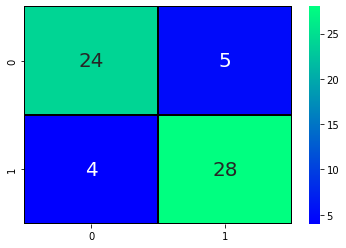

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))
print(classification_report(y_test, prediction3))

Testing Accuracy for SVM: 0.8852459016393442
Testing Sensitivity for Random Forest: 0.8666666666666667
Testing Specificity for Random Forest: 0.9032258064516129
Testing Precision for Random Forest: 0.896551724137931
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.97      0.97      0.97        32

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



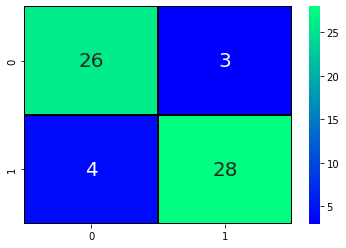

In [76]:
  from sklearn.svm import SVC
  svm=SVC(C=12,kernel='linear')
  model4=svm.fit(X_train,y_train)
  prediction4=model4.predict(X_test)
  cm4= confusion_matrix(y_test,prediction4)
  sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
  TP=cm4[0][0]
  TN=cm4[1][1]
  FN=cm4[1][0]
  FP=cm4[0][1]
  
  print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
  print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
  print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
  print('Testing Precision for Random Forest:',(TP/(TP+FP)))
  
  print(classification_report(y_test, prediction))

In [77]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [78]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
input=(63,1,3,145,233,0,0,150,1,2.3,0,0,2)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be have heart disease:(


/home/agrima/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
